In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
np.random.seed(0)

In [0]:
def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)



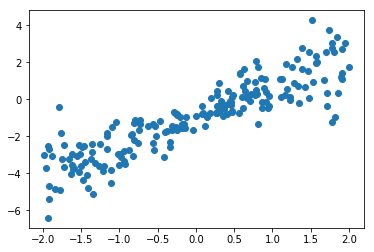

In [5]:
x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [0]:
tf.keras.backend.clear_session()

x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

model.summary()

callback_list = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.compile(optimizer='sgd', loss='mse')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 2.3422 - val_loss: 1.5838
Epoch 2/300
105/105 [==============================] - 0s 160us/sample - loss: 2.0567 - val_loss: 1.4533
Epoch 3/300
105/105 [==============================] - 0s 165us/sample - loss: 1.8276 - val_loss: 1.3426
Epoch 4/300
105/105 [==============================] - 0s 155us/sample - loss: 1.6345 - val_loss: 1.2504
Epoch 5/300
105/105 [==============================] - 0s 163us/sample - loss: 1.4743 - val_loss: 1.1755
Epoch 6/300
105/105 [==============================] - 0s 151us/sample - loss: 1.3419 - val_loss: 1.1209
Epoch 7/300
105/105 [==============================] - 0s 149us/sample - loss: 1.2499 - val_loss: 1.0770
Epoch 8/300
105/105 [==============================] - 0s 144us/sample - loss: 1.1679 - val_loss: 1.0383
Epoch 9/300
105/105 [==============================] - 0s 138us/sample - loss: 1.0989 - val_loss: 1.0054
Epoch 10/300

In [ ]:
epochs = np.arange(1, 300+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
%load_ext tensorboard
%tensorboard --logdir logs --port 6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 28296), started 0:00:49 ago. (Use '!kill 28296' to kill it.)